<a href="https://colab.research.google.com/github/vkdan007/open/blob/main/%22lab_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 2. Зависимость удельной $E_{св}$ от массового числа  
1. Гит: ветки, пулл-реквесты.  
2. Импорт собственных функций в ноутбук.  
3. Метод \_\_dict\_\_  
4. DataFrame библиотеки pandas  
5. Методы apply, drop
6. График энергии связи на нуклон

## Подготовка

In [41]:
!pip install mendeleev

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from mendeleev import element, get_all_elements, isotope, Isotope, Element

In [43]:
Isotope.__dict__

mappingproxy({'__module__': 'mendeleev.models',
              '__doc__': '\n    Isotope\n\n    Args:\n        abundance (float): Abundance of the isotope\n        abundance_uncertainty (float): Abundance uncertainty\n        atomic_number (int): Atomic number\n        discovery_year (int): Year the isotope was discovered\n        g_factor (float): Dimensionless magnetic moment\n        g_factor_uncertainty (float): Uncertainty for the `g_factor`\n        half_life (float): Half life time\n        half_life_uncertainty (float): Uncertainty for the `half_life`\n        half_life_unit (str): Unit for the half life time\n        is_radioactive (bool): A flag marking wheather the isotope is radioactive\n        mass (float): Mass of the isotope\n        mass_number (int): Mass number of the isotope\n        mass_uncertainty (float): Uncertainty of the mass value\n        parity (str): Parity, if present, it can be either `+` or `-`\n        quadrupole_moment (float): Quadrupole moment\n    

In [44]:
isotopes = []
elems = get_all_elements()
for elem in elems:
  isotopes.extend(elem.isotopes)

In [45]:
df = pd.DataFrame(data=isotopes, columns=['Iso'])


In [46]:
df['Z'] = df.apply(lambda x: x['Iso'].atomic_number, axis=1) #протон
df['A'] = df.apply(lambda x: x['Iso'].mass_number, axis=1) #нуклон
df['N'] = df.apply(lambda x: x['Iso'].mass_number-x['Iso'].atomic_number, axis=1) #нуклон
df['mass'] = df.apply(lambda x: x['Iso'].mass, axis=1)

In [47]:

df

,Iso,Z,A,N,mass
0,"atomic_number= 1, mass_number= 1, mass=1...",1,1,0,1.007825
1,"atomic_number= 1, mass_number= 2, mass=2...",1,2,1,2.014102
2,"atomic_number= 1, mass_number= 3, mass=3...",1,3,2,3.016049
3,"atomic_number= 1, mass_number= 4, mass=4...",1,4,3,4.026432
4,"atomic_number= 1, mass_number= 5, mass=5...",1,5,4,5.035311
...,...,...,...,...,...
3552,"atomic_number= 117, mass_number= 293, mass=2...",117,293,176,293.208727
3553,"atomic_number= 117, mass_number= 294, mass=2...",117,294,177,294.210840
3554,"atomic_number= 118, mass_number= 293, mass=2...",118,293,175,293.213423
3555,"atomic_number= 118, mass_number= 294, mass=2...",118,294,176,294.213979


## Удельная энергия связи

Требуется построить график удельной энергии связи ядра, приходящейся на один нуклон, в зависимости от числа нуклонов в ядре.  Единицы энергии, используемые на графике - МэВ

$E_{уд\ св} = \dfrac{E_{св}}{A}$, где  
$A$ - количество нуклонов (протоны + нейроны), a.k.a. массовое число

$E_{св} = \Delta m * c^2$, где  
- $\Delta m$ - деффект массы,  
- $c$ - скорость света.  

$\Delta m = \sum_{i} N_i * m_i$, где  
 - $N_i$ - количество,
 - $m_i$ - масса, $i \in {n,p}$.

In [48]:
def from_aem_to_kg(aems):
  'Перевод массы из а.е.м. в кг'
  return aems * 1.6605 * 10**(-27)

neutron_mass = 1.6749  * 10**(-27) # кг
proton_mass =  1.6726  * 10**(-27) # кг
c = 3 * 10**8 # м/c

def J_to_MeV(en):
  'Перевод энергии из джоулей в МэВ'
  return en / (1.602176634 *10**(-19)) / 10**6

In [49]:
df['del_m'] = df['Z'] * proton_mass + (df['A'] - df['Z']) * neutron_mass - from_aem_to_kg(df['mass'])
df['Ecv']=J_to_MeV(df['del_m']*c*c)
df['Eud']=df['Ecv']/df['A']
df



,Iso,Z,A,N,mass,del_m,Ecv,Eud
0,"atomic_number= 1, mass_number= 1, mass=1...",1,1,0,1.007825,-8.934655e-31,-0.501892,-0.501892
1,"atomic_number= 1, mass_number= 2, mass=2...",1,2,1,2.014102,3.083998e-30,1.732392,0.866196
2,"atomic_number= 1, mass_number= 3, mass=3...",1,3,2,3.016049,1.425017e-29,8.004830,2.668277
3,"atomic_number= 1, mass_number= 4, mass=4...",1,4,3,4.026432,1.140988e-29,6.409341,1.602335
4,"atomic_number= 1, mass_number= 5, mass=5...",1,5,4,5.035311,1.106527e-29,6.215757,1.243151
...,...,...,...,...,...,...,...,...
3552,"atomic_number= 117, mass_number= 293, mass=2...",117,293,176,293.208727,3.603509e-27,2024.219968,6.908601
3553,"atomic_number= 117, mass_number= 294, mass=2...",117,294,177,294.210840,3.614400e-27,2030.338037,6.905912
3554,"atomic_number= 118, mass_number= 293, mass=2...",118,293,175,293.213423,3.593411e-27,2018.547724,6.889241
3555,"atomic_number= 118, mass_number= 294, mass=2...",118,294,176,294.213979,3.606888e-27,2026.118104,6.891558


### Построение графика
Тип графика - диаграмма рассеяния.  График должен иметь
- грамотно подписанные оси,
- достаточно маленькую цену деления,
- визуально оптимальный размер отметки,
- разметку (сетку).

#### Теор. справка. df $\rightarrow$ ndarray
Извлечение массива значений из колонки датафрейма

In [50]:
my_df = pd.DataFrame(np.array([1,2,3]), columns=[['my_col']])
my_col_values = my_df['my_col'].values
print(f'Извлечены данные: {my_col_values}, тип - {type(my_col_values)}')

Извлечены данные: [[1]
 [2]
 [3]], тип - <class 'numpy.ndarray'>


In [51]:
my_col_values = my_col_values.reshape(-1)
my_col_values.shape

(3,)

In [52]:
df_Eud=df['Eud'].to_numpy()
df_A=df['A'].to_numpy()

#### Теор. справка. Слайсы
Если при соблюдении всех указанных выше правил отметки все равно сливаются (именно так у вас и должно получиться), необходимо привести на графике точки с некоторым фиксированным шагом по массиву значений. Воспользуйтесь numpy-слайсами, см. пример ниже.


In [53]:
big_arr = np.arange(100)
print('Исходный', big_arr, sep='\t')
sparse_arr = big_arr[::10]
print('Разреженный', sparse_arr, sep='\t')

Исходный	[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Разреженный	[ 0 10 20 30 40 50 60 70 80 90]


In [54]:
df_Eud=df_Eud[::10]
df_A=df_A[::10]

#### <ГРАФИК>



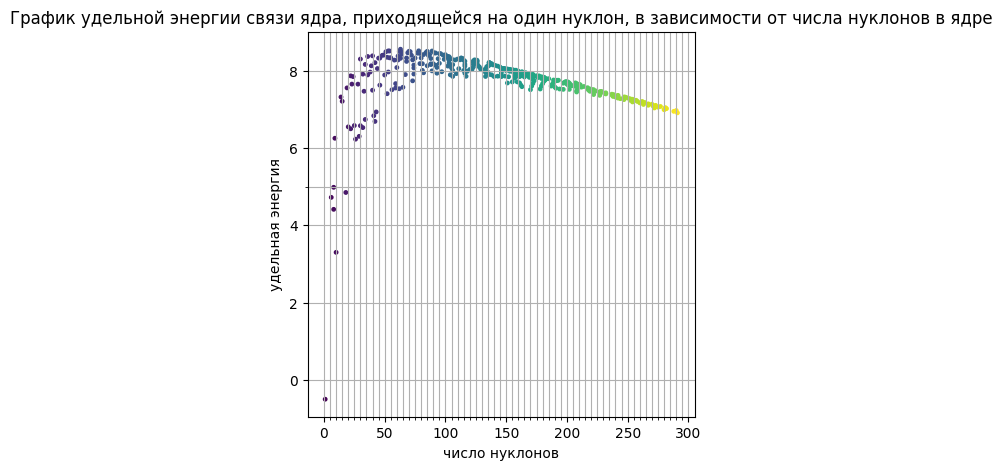

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_A,df_Eud, s=6, c=df_A)
ax.set_xlabel('число нуклонов')
ax.set_ylabel('удельная энергия')
ax.set_xticks(np.arange(0, 300, 5), minor=True)
ax.set_yticks(np.arange(0, 10, 5), minor=True)
ax.set_title('График удельной энергии связи ядра, приходящейся на один нуклон, в зависимости от числа нуклонов в ядре')
ax.grid(True, 'both', 'both')

None

In [56]:
print("\nСтолбцы isotopes:")
print(df.columns)


Столбцы isotopes:
Index(['Iso', 'Z', 'A', 'N', 'mass', 'del_m', 'Ecv', 'Eud'], dtype='object')


In [57]:
df.to_pickle('isotope_params.pkl')

## Выводы  
В данной лабораторной работе мы потренировались в работе с фреймворком пандас,
построили график удельной энергии связи ядра, приходящейся на один нуклон, в зависимости от числа нуклонов в ядре.
По полученному графику видно, что при увеличении атомного номера удельная энергия увеличивается до того момента, когда число нуклонов примерно равно 75, а затем наблюдается плавный спад удельной энергии.
Наибольшей энергией обладают элементы, имеющие число нуклонов примерно в диапазоне от 50 до 100.
